
##  Iowa House Price (*Base models*) 


## Part 1: Simple EDA, value count, fill nulls and imputation     

## Part 2: Base models: linear, ridge, and lasso regressions              

## Part 3: Other models:  
- Elastic net 
- Random forest regressor   
- support vector regressor 
- XG Boost regressor     

## Part 1: Simple EDA and fill nulls  

###  Part 1.1: Load libraries and data info 

In [1]:
''' Import libraries '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns   

from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV  

from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge   
from sklearn.linear_model import ElasticNet 

from sklearn.tree import DecisionTreeRegressor    
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR   
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor    
# from xgboost import XGBRegressor  
from sklearn import metrics   
from sklearn.metrics import mean_squared_error  

pd.set_option('display.max_columns', 900)   
pd.set_option('display.max_rows', 900)

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'   

In [2]:
from read_path_module import read_data_relative_path

df_train = read_data_relative_path(relative_dataset_path = './data/kaggle/train.csv',
                        data_type='csv'
                       )

df_test = read_data_relative_path(relative_dataset_path = './data/kaggle/test.csv',
                        data_type='csv'
                       )

df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:

# df_train = pd.read_csv('house_train.csv')   
# #df_test = pd.read_csv('house_test.csv')  

# df_train.head(15)


In [4]:
''' Shape of the dataset '''    

print('Training set:', df_train.shape)  
#print('Test set:', df_test.shape)   


Training set: (1460, 81)


In [5]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
''' Information on df_train '''   

df_train.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
''' correlation heatmap of numerical features '''

df_train.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3)     


###  Part 1.2.  Create a copy of df_train to isolate on numerical features with high correlations (> 0.5) with the target, SalePrice    

In [9]:
''' Create a copy data frame with corr > 0.5 '''

df_1 = df_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 
                'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]      


In [10]:
''' df_1 correlation heatmap '''

df_1.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3) 

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000,0.572,0.551,0.538,0.476,0.593,0.551,0.427,0.601,0.562,0.791
YearBuilt,0.572,1.000,0.593,0.391,0.282,0.199,0.468,0.096,0.538,0.479,0.523
YearRemodAdd,0.551,0.593,1.000,0.291,0.240,0.287,0.439,0.192,0.421,0.372,0.507
TotalBsmtSF,0.538,0.391,0.291,1.000,0.820,0.455,0.324,0.286,0.435,0.487,0.614
1stFlrSF,0.476,0.282,0.240,0.820,1.000,0.566,0.381,0.410,0.439,0.490,0.606
GrLivArea,0.593,0.199,0.287,0.455,0.566,1.000,0.630,0.825,0.467,0.469,0.709
FullBath,0.551,0.468,0.439,0.324,0.381,0.630,1.000,0.555,0.470,0.406,0.561
TotRmsAbvGrd,0.427,0.096,0.192,0.286,0.410,0.825,0.555,1.000,0.362,0.338,0.534
GarageCars,0.601,0.538,0.421,0.435,0.439,0.467,0.470,0.362,1.000,0.882,0.640
GarageArea,0.562,0.479,0.372,0.487,0.490,0.469,0.406,0.338,0.882,1.000,0.623


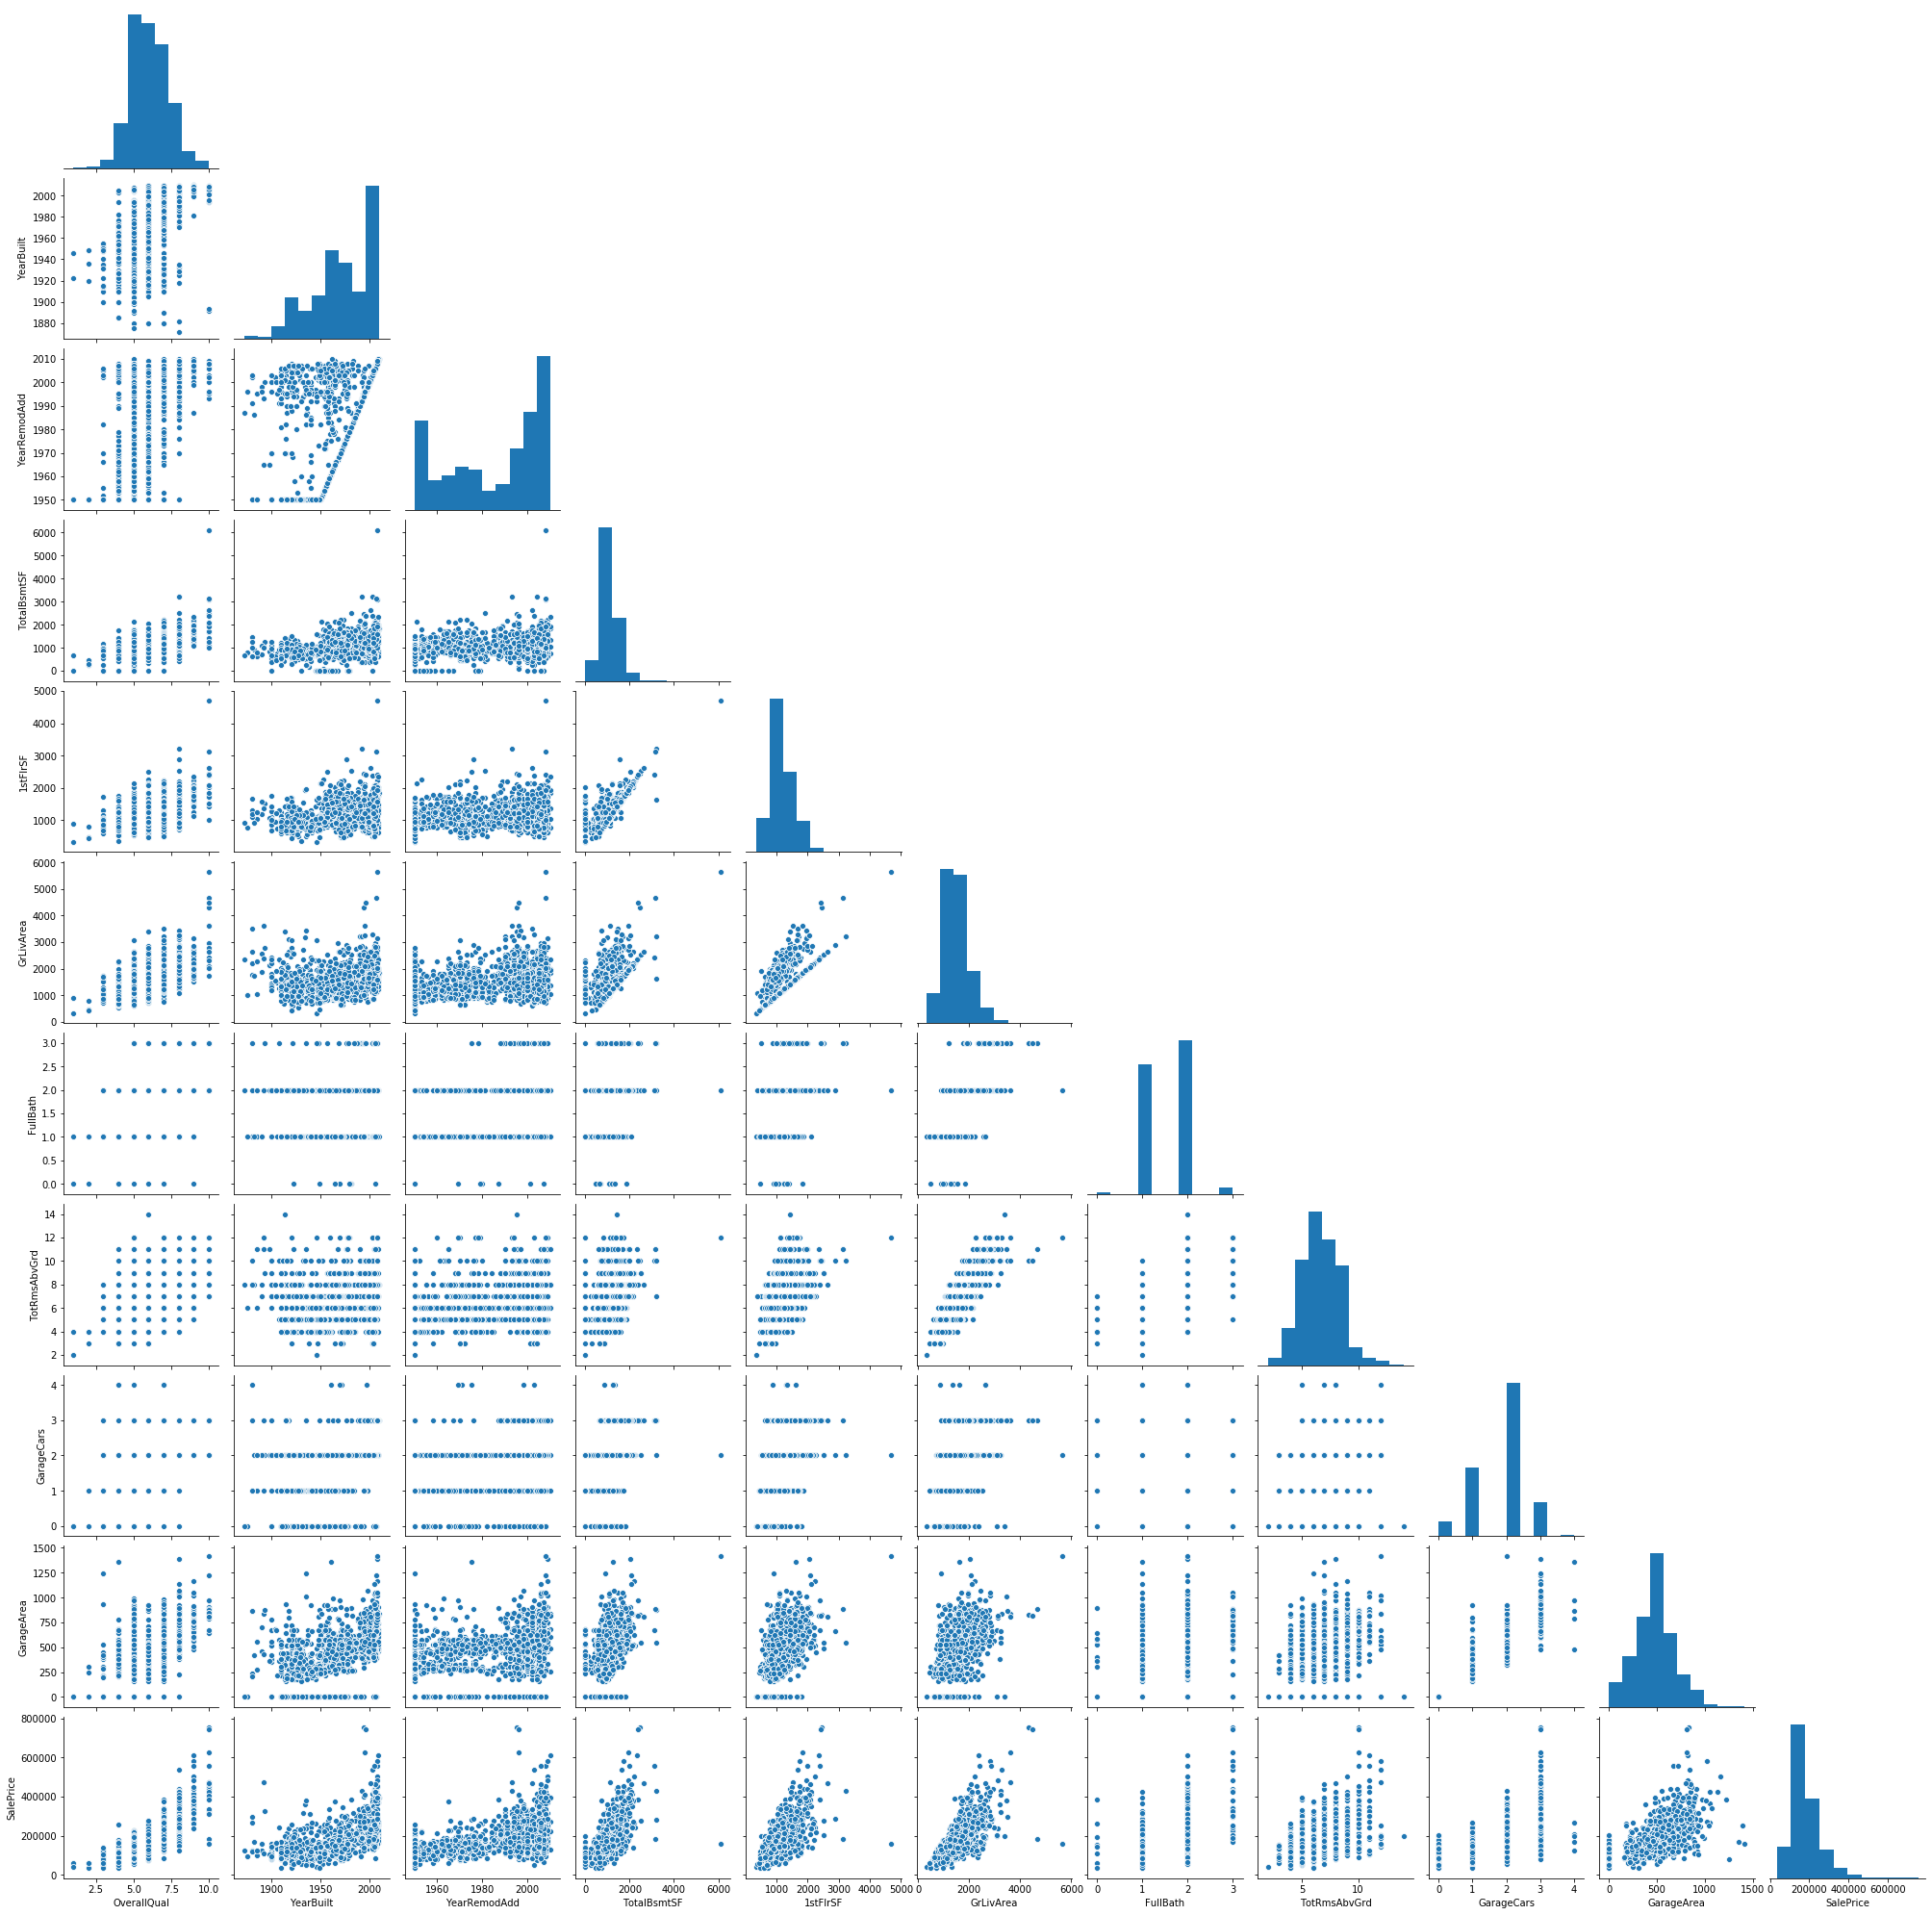

In [11]:
''' pair plot of df_1 via Seaborn '''   

sns.pairplot(df_1, corner = True) 

plt.show()   

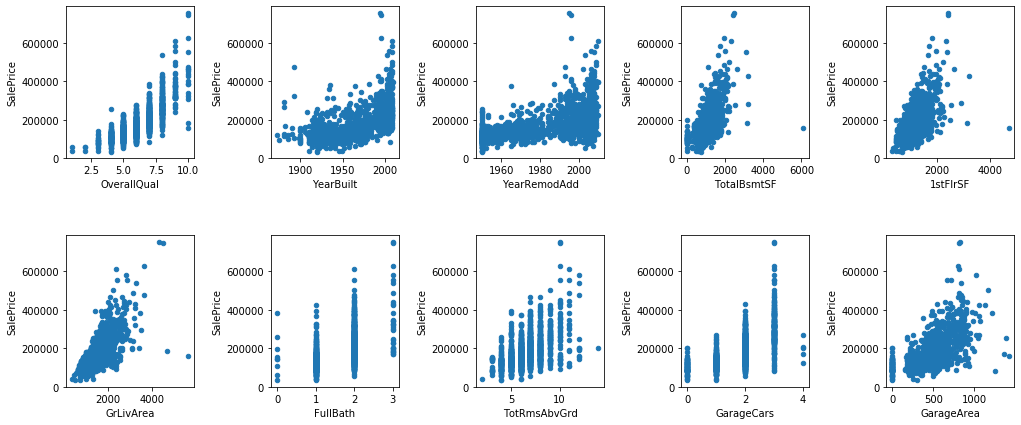

In [12]:
''' Scatter plots of high correlation features (> 0.5) with SalePrice ''' 

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (17, 7))
df_1.plot(ax = axes[0, 0], kind = 'scatter', x = 'OverallQual', y = 'SalePrice') 
df_1.plot(ax = axes[0, 1], kind = 'scatter', x = 'YearBuilt', y = 'SalePrice') 
df_1.plot(ax = axes[0, 2], kind = 'scatter', x = 'YearRemodAdd', y = 'SalePrice') 
df_1.plot(ax = axes[0, 3], kind = 'scatter', x = 'TotalBsmtSF', y = 'SalePrice') 
df_1.plot(ax = axes[0, 4], kind = 'scatter', x = '1stFlrSF', y = 'SalePrice') 
df_1.plot(ax = axes[1, 0], kind = 'scatter', x = 'GrLivArea', y = 'SalePrice') 
df_1.plot(ax = axes[1, 1], kind = 'scatter', x = 'FullBath', y = 'SalePrice') 
df_1.plot(ax = axes[1, 2], kind = 'scatter', x = 'TotRmsAbvGrd', y = 'SalePrice') 
df_1.plot(ax = axes[1, 3], kind = 'scatter', x = 'GarageCars', y = 'SalePrice') 
df_1.plot(ax = axes[1, 4], kind = 'scatter', x = 'GarageArea', y = 'SalePrice')   

plt.subplots_adjust(wspace = 0.6, hspace = 0.5) 
plt.show()   


###  Part 1.3:  Distribution of the target (SalePrice)        

[]

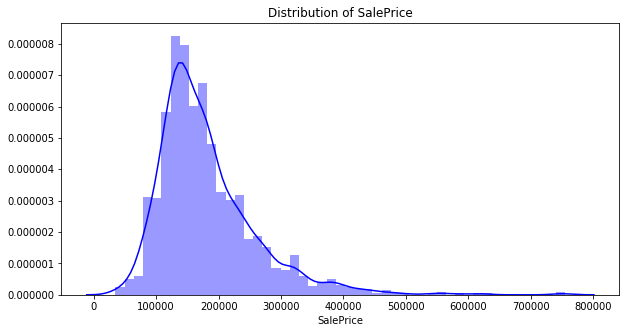

In [13]:
''' histogram of the target/label SalePrice  '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_train['SalePrice'], color = 'blue')  
plt.title('Distribution of SalePrice')   

plt.plot()   



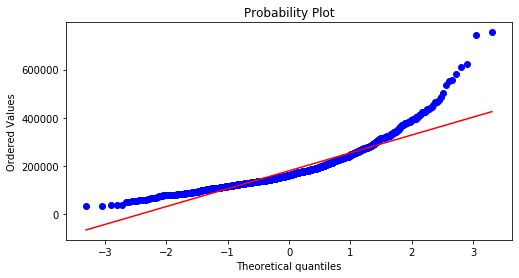

In [14]:
''' normal probability distribution plot - QQ plot'''

from scipy import stats 

fig = plt.figure(figsize = (8, 4))     
res = stats.probplot(df_train['SalePrice'], plot = plt)  



###  Part 1.4:  Categorical features: Neighborhood      

In [15]:
''' Value count of Neighborhood '''   

df_train['Neighborhood'].value_counts(ascending = True) 


Blueste      2
NPkVill      9
Veenker     11
BrDale      16
Blmngtn     17
MeadowV     17
SWISU       25
StoneBr     25
ClearCr     28
IDOTRR      37
Timber      38
NoRidge     41
Mitchel     49
Crawfor     51
BrkSide     58
SawyerW     59
NWAmes      73
Sawyer      74
NridgHt     77
Gilbert     79
Somerst     86
Edwards    100
OldTown    113
CollgCr    150
NAmes      225
Name: Neighborhood, dtype: int64

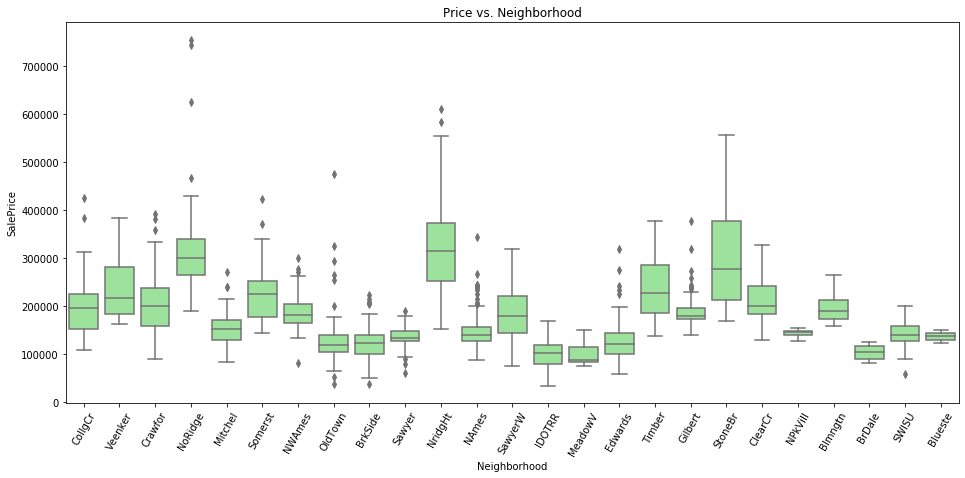

In [16]:
''' Box plot of SalePrice vs. Neighborhood (unordered) '''   

plt.figure(figsize = (16, 7)) 
 
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df_train, color = 'lightgreen') 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)  
plt.title('Price vs. Neighborhood')

plt.show() 


In [17]:
''' Median SalePrice of Neighborhood '''   

df_train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending = True)   


Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64

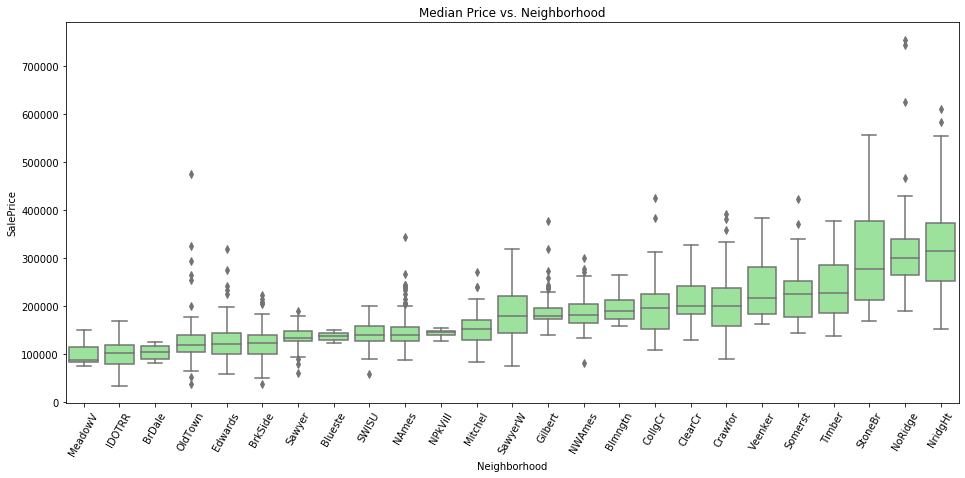

In [18]:
''' Box plot of median SalePrice vs. Neighborhood (ordered) '''  

plt.figure(figsize = (16, 7)) 

ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', 
                 data = df_train, 
                 order = ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide', 'Sawyer', 'Blueste', 
                          'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW', 'Gilbert', 'NWAmes', 'Blmngtn', 
                          'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber', 
                          'StoneBr', 'NoRidge', 'NridgHt'], color = 'lightgreen') 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)  
plt.title('Median Price vs. Neighborhood')

plt.show() 


###  Part 1.5: Categorical features: value count    

In [19]:

## new data frame for integers and strings 
# df_cat = df_train.select_dtypes(['int64', 'object'])   

for col in df_train.columns: 
    print('-'*20 + col + '-'*20)      
    display(df_train[col].value_counts(dropna = False).head(20))  




--------------------Id--------------------


1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
Name: Id, dtype: int64

--------------------MSSubClass--------------------


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

--------------------MSZoning--------------------


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

--------------------LotFrontage--------------------


NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
Name: LotFrontage, dtype: int64

--------------------LotArea--------------------


7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
3182      7
7800      6
8450      6
10000     5
4500      5
4435      5
5000      5
10140     5
Name: LotArea, dtype: int64

--------------------Street--------------------


Pave    1454
Grvl       6
Name: Street, dtype: int64

--------------------Alley--------------------


NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

--------------------LotShape--------------------


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

--------------------LandContour--------------------


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

--------------------Utilities--------------------


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

--------------------LotConfig--------------------


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

--------------------LandSlope--------------------


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

--------------------Neighborhood--------------------


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Name: Neighborhood, dtype: int64

--------------------Condition1--------------------


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

--------------------Condition2--------------------


Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

--------------------BldgType--------------------


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

--------------------HouseStyle--------------------


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

--------------------OverallQual--------------------


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

--------------------OverallCond--------------------


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

--------------------YearBuilt--------------------


2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
Name: YearBuilt, dtype: int64

--------------------YearRemodAdd--------------------


1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
Name: YearRemodAdd, dtype: int64

--------------------RoofStyle--------------------


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

--------------------RoofMatl--------------------


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

--------------------Exterior1st--------------------


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

--------------------Exterior2nd--------------------


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

--------------------MasVnrType--------------------


None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

--------------------MasVnrArea--------------------


0.0      861
72.0       8
180.0      8
NaN        8
108.0      8
120.0      7
16.0       7
106.0      6
80.0       6
340.0      6
200.0      6
132.0      5
170.0      5
360.0      5
84.0       5
320.0      5
270.0      4
183.0      4
100.0      4
168.0      4
Name: MasVnrArea, dtype: int64

--------------------ExterQual--------------------


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

--------------------ExterCond--------------------


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

--------------------Foundation--------------------


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

--------------------BsmtQual--------------------


TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

--------------------BsmtCond--------------------


TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

--------------------BsmtExposure--------------------


No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

--------------------BsmtFinType1--------------------


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

--------------------BsmtFinSF1--------------------


0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
400       4
300       4
312       4
495       4
384       4
697       4
641       4
360       4
Name: BsmtFinSF1, dtype: int64

--------------------BsmtFinType2--------------------


Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

--------------------BsmtFinSF2--------------------


0      1293
180       5
374       3
551       2
93        2
468       2
147       2
480       2
539       2
712       2
117       2
279       2
96        2
391       2
287       2
290       2
294       2
64        2
41        2
182       2
Name: BsmtFinSF2, dtype: int64

--------------------BsmtUnfSF--------------------


0      118
728      9
384      8
572      7
600      7
300      7
440      6
625      6
280      6
672      6
270      6
162      5
108      5
490      5
390      5
80       5
326      5
816      5
698      5
319      5
Name: BsmtUnfSF, dtype: int64

--------------------TotalBsmtSF--------------------


0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
848     11
780     11
894     11
832     10
630      9
756      9
952      9
1056     8
936      8
1008     7
483      7
840      7
Name: TotalBsmtSF, dtype: int64

--------------------Heating--------------------


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

--------------------HeatingQC--------------------


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

--------------------CentralAir--------------------


Y    1365
N      95
Name: CentralAir, dtype: int64

--------------------Electrical--------------------


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

--------------------1stFlrSF--------------------


864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
764      6
990      6
728      6
1056     6
840      6
882      6
1728     6
720      6
Name: 1stFlrSF, dtype: int64

--------------------2ndFlrSF--------------------


0      829
728     10
504      9
672      8
546      8
720      7
600      7
896      6
780      5
862      5
689      5
840      5
756      5
702      4
739      4
551      4
741      4
878      4
804      4
670      3
Name: 2ndFlrSF, dtype: int64

--------------------LowQualFinSF--------------------


0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
Name: LowQualFinSF, dtype: int64

--------------------GrLivArea--------------------


864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
Name: GrLivArea, dtype: int64

--------------------BsmtFullBath--------------------


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

--------------------BsmtHalfBath--------------------


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

--------------------FullBath--------------------


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

--------------------HalfBath--------------------


0    913
1    535
2     12
Name: HalfBath, dtype: int64

--------------------BedroomAbvGr--------------------


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

--------------------KitchenAbvGr--------------------


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

--------------------KitchenQual--------------------


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

--------------------TotRmsAbvGrd--------------------


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

--------------------Functional--------------------


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

--------------------Fireplaces--------------------


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

--------------------FireplaceQu--------------------


NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

--------------------GarageType--------------------


Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

--------------------GarageYrBlt--------------------


NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1962.0    21
2009.0    21
1966.0    21
1965.0    21
Name: GarageYrBlt, dtype: int64

--------------------GarageFinish--------------------


Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

--------------------GarageCars--------------------


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

--------------------GarageArea--------------------


0      81
440    49
576    47
240    38
484    34
528    33
288    27
400    25
480    24
264    24
308    20
420    19
280    16
672    15
216    12
504    12
336    12
352    12
360    11
564    11
Name: GarageArea, dtype: int64

--------------------GarageQual--------------------


TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64

--------------------GarageCond--------------------


TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

--------------------PavedDrive--------------------


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

--------------------WoodDeckSF--------------------


0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
240     10
208     10
216      9
180      8
160      8
250      6
132      6
264      6
143      6
96       6
156      6
171      5
Name: WoodDeckSF, dtype: int64

--------------------OpenPorchSF--------------------


0     656
36     29
48     22
20     21
40     19
45     19
30     16
24     16
60     15
39     14
28     14
44     13
50     13
54     13
72     12
98     11
63     11
35     11
32     11
75     10
Name: OpenPorchSF, dtype: int64

--------------------EnclosedPorch--------------------


0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
Name: EnclosedPorch, dtype: int64

--------------------3SsnPorch--------------------


0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

--------------------ScreenPorch--------------------


0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
Name: ScreenPorch, dtype: int64

--------------------PoolArea--------------------


0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

--------------------PoolQC--------------------


NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

--------------------Fence--------------------


NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

--------------------MiscFeature--------------------


NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

--------------------MiscVal--------------------


0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
Name: MiscVal, dtype: int64

--------------------MoSold--------------------


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

--------------------YrSold--------------------


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

--------------------SaleType--------------------


WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

--------------------SaleCondition--------------------


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

--------------------SalePrice--------------------


140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
Name: SalePrice, dtype: int64


###  Part 1.6: Null count 


In [20]:
''' Number of nulls '''

df_train.isnull().sum().sort_values()   

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

In [21]:
''' Percent of nulls '''    

100 * df_train.isnull().sum().sort_values() / len(df_train)  


Id                0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
BsmtUnfSF         0.000000
3SsnPorch         0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
PavedDrive        0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
EnclosedPorch     0.000000
BsmtFinSF2        0.000000
HeatingQC         0.000000
SalePrice         0.000000
LandSlope         0.000000
L

### Null  !=  missing value

- The following features have **interpretation for null**:    
    - MasVnrType: NaN = no masonry 
    - MasVnrArea: NaN = no area (NaN correlated with above)   
    - BsmtQual: NaN = no basement 
    - BsmtCond: NaN = no basement  
    - BsmtFinType1: NaN = no basement 
    - BsmtFinType2: NaN = no basement   
    - BsmtExposure: NaN = no basement   
    - GarageQual: NaN = no garage 
    - GarageFinish: NaN = no garage 
    - GarageYrBlt: NaN = no garage 
    - GarageType: NaN = no garage 
    - GarageCond: NaN = no garage 
    - FireplaceQu: NaN = no fireplace
    - Fence: NaN = no fence  
    - Alley: NaN = no alley access to the house   
    - MiscFeature: NaN = no special feature    
    - PoolQC: NaN = no pool  



- The following features with **nulls as missing value**:        
    - Electrical: NaN = missing value  
    - LotFrontage: NaN = missing value 


###  Part 1.7: Feature imputation: Part 1 => fill in true nulls        

- **Electrical:** only one missing value; use mode imputation since it's categorical ==> column to be dropped  
- **LotFrontage:** to use uniform random imputation   

[]

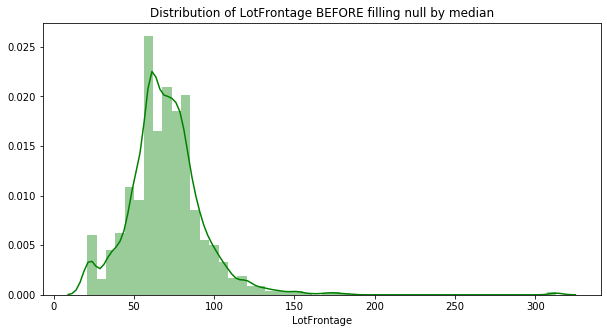

In [22]:
''' histogram of the LotFrontage feature prior to fill null '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_train['LotFrontage'], color = 'green')  
plt.title('Distribution of LotFrontage BEFORE filling null by median')   

plt.plot() 

In [23]:
''' Impute LotFrontage feature by random values from the column '''

df_train['LotFrontage'] = df_train['LotFrontage'].mask(df_train['LotFrontage'].isnull(), np.random.uniform(df_train['LotFrontage'].min(), df_train['LotFrontage'].max(), size = df_train['LotFrontage'].shape)) 


[]

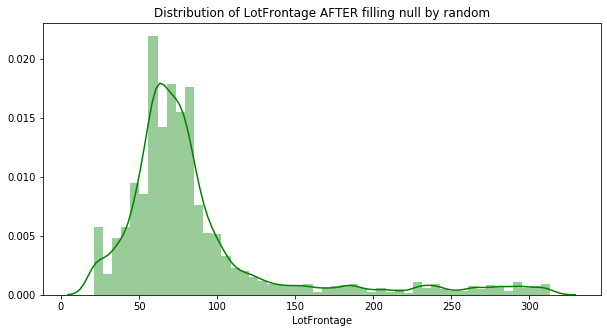

In [24]:
''' histogram of the feature LotFrontage feature after fill null '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_train['LotFrontage'], color = 'green')  
plt.title('Distribution of LotFrontage AFTER filling null by random')   

plt.plot() 

In [25]:
''' Impute GarageYrBlt feature by random values from the column '''

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].mask(df_train['GarageYrBlt'].isnull(), np.random.uniform(df_train['GarageYrBlt'].min(), df_train['GarageYrBlt'].max(), size = df_train['GarageYrBlt'].shape))     


In [26]:
''' Impute MasVnrArea feature by random values from the column '''

df_train['MasVnrArea'] = df_train['MasVnrArea'].mask(df_train['MasVnrArea'].isnull(), np.random.uniform(df_train['MasVnrArea'].min(), df_train['MasVnrArea'].max(), size = df_train['MasVnrArea'].shape))   



In [27]:
''' Check the dtypes of the imputed features '''

print('LotFrontage type:', df_train['LotFrontage'].dtypes)    
print('GarageYrBlt type:', df_train['GarageYrBlt'].dtypes)   
print('MasVnrArea type:', df_train['MasVnrArea'].dtypes)    


LotFrontage type: float64
GarageYrBlt type: float64
MasVnrArea type: float64


###  Part 1.8:  Feature imputation: Part 2 => fill None for nulls that means not having specified feature     

- fill in the nulls that have no respective indicated features          
-     

In [28]:
''' Fill the remianing nulls associated with "object" with "None" in the dataset '''

df_train.fillna('Nothing', inplace = True)  


In [29]:
''' Check for nulls again '''

df_train.isnull().sum().sort_values()   

Id               0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
GarageType       0
HalfBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
FullBath         0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
SaleCondition    0
HeatingQC        0
TotalBsmtSF      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
OverallQual      0
Utilities        0
LotShape         0
Alley       

###  Part 1.9: Drop the 'Id' column     

- **Id:** identification purposes only     
- **Utilities:** All values = public except 1; feature has low variance 
- **Fence:** 81% of houses don't have fencing 
- **Alley:** 94% of houses have no alley access      
- **MiscFeature:** 96% of houses don't have special features not already captured by other variables; feature has low variance 
- **PoolQC:** 99% of house don't have a pool; feature has low variance    


In [30]:
''' Drop the 'Id' column '''   

df = df_train.drop(['Id'], axis = 1)     
df.head(15)   



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Nothing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Nothing,Nothing,Nothing,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,Nothing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Nothing,Nothing,Nothing,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,Nothing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Nothing,Nothing,Nothing,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,Nothing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Nothing,Nothing,Nothing,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,Nothing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Nothing,Nothing,Nothing,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,Nothing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Nothing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Nothing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Nothing,Nothing,Nothing,0,8,2007,WD,Normal,307000
7,60,RL,32.909304,10382,Pave,Nothing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Nothing,Nothing,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Nothing,Nothing,Nothing,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave

In [31]:

df.shape  

(1460, 80)

In [32]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

###  Part 1.10: Dummify the categorical columns   

In [33]:
''' strip out the columns to be dummified '''

df_1 = df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
           'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
           'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
           'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]      

df_1   



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Nothing,Attchd,RFn,TA,TA,Y,Nothing,Nothing,Nothing,WD,Normal
1,RL,Pave,Nothing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Nothing,Nothing,Nothing,WD,Normal
2,RL,Pave,Nothing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Nothing,Nothing,Nothing,WD,Normal
3,RL,Pave,Nothing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Nothing,Nothing,Nothing,WD,Abnorml
4,RL,Pave,Nothing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Nothing,Nothing,Nothing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Nothing,Nothing,Nothing,WD,Normal
1456,RL,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Nothing,MnPrv,Nothing,WD,Normal
1457,RL,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Nothing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Nothing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Nothing,Attchd,Unf,TA,TA,Y,Nothing,Nothing,Nothing,WD,Normal


In [34]:
''' test pandas dummify on categorical columns '''

df_dum = pd.get_dummies(df_1, drop_first = True)  # the prefix for the prefix of the new columns
df_dum  


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Nothing,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Nothing,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nothing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Nothing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Nothing,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nothing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nothing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Nothing,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nothing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nothing,GarageFinish_Nothing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Nothing,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Nothing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_Nothing,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nothing,MiscFeature_Nothing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0

In [35]:
df_dum.shape   

(1460, 225)

###  Part 1.11: Numerical columns    

In [36]:
''' define numerical columns '''

df_num = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
             'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
             'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
             'YrSold', 'SalePrice']] 

df_num


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [37]:
df_num.shape   

(1460, 37)

###  Part 1.12: Combine the numerical and the dummified columns  

In [38]:
''' *** df redefined by combining df_num and df_dum *** ''' 

df = pd.concat([df_num, df_dum], axis = 1) 
df         
    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Nothing,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Nothing,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nothing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Nothing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Nothing,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nothing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nothing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Nothing,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nothing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Nothing,GarageFinish_Nothing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Nothing,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Nothing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_Nothing,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Nothing,MiscFeature_Nothing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_

###  Part 1.13: Create dependent (X) and independent (y) variables  

In [39]:

# create X and y      
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']  

# train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  


###  Part 1.14: Standardize the features 

In [40]:
''' Standardarize the dependent variables X '''

''' Scaling the data set '''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)     # Note this is .fit_transform
X_test = scaler.transform(X_test)           # note this is .transform


## Part 2: Base Models    

###  Part 2.1:  Ordinary multiple linear regression 

In [41]:

# linear regression   
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:

print(f'ordinary linear regression score: {lin_reg.score(X_train, y_train)}', '\n')  

ordinary linear regression score: 0.9341806613131899 



In [43]:
''' Display the coefficients '''

coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns = ['Coefficients'])   
coefficients  

,Coefficients
MSSubClass,-3.426952e+03
LotFrontage,-1.250710e+02
LotArea,5.715646e+03
OverallQual,9.664823e+03
OverallCond,5.474002e+03
YearBuilt,8.158280e+03
YearRemodAdd,2.363431e+03
MasVnrArea,5.090291e+03
BsmtFinSF1,6.700134e+15
BsmtFinSF2,2.335310e+15


In [44]:
lin_reg.intercept_  

182060.02886717807

In [45]:

''' Predict the label for test_features. '''

predictions = lin_reg.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predictions': predictions})

comparison.head(10)  



,Actual,Predictions
713,129000,119479.512266
1306,202500,203415.353086
1437,394617,391578.251523
588,143000,241638.550352
1114,117000,115248.219297
1124,163900,161734.121641
1432,64500,89224.438047
26,134800,135114.981016
1416,122500,129498.637266
1315,206900,201609.840391


In [46]:

''' Predict the label for test_features. '''
# #predictions = lin_reg.predict(X_test)
# metrics.r2_score(y_test, predictions)    

# mae = metrics.mean_absolute_error(y_test, predictions)   

# #print(f'r^2 score: {:.6f}'.format(metrics.r2_score(y_test, predictions)))   
# print(f'r^2 score: {metrics.r2_score(y_test, predictions)}') 
# print(f'r^2 score: {lin_reg.score(y_test.values.reshape(-1, 1), predictions)}')
# # print()
# # print('Mean Squared Error (MSE): {:.6f}'.format(mse))  


' Predict the label for test_features. '

In [47]:
y_test.shape

(292,)

In [48]:
predictions.shape    

(292,)

###  Part 2.2: Lasso and ridge regressions 

In [49]:

lasso = Lasso()
ridge = Ridge()  

params_lasso = [ {'alpha':[1e-4, 1e-2, 0.1, 1, 2, 20, 30]} ]
params_ridge = [ {'alpha':[1e-4, 1e-2, 0.1, 1, 2, 10, 20]} ]     


In [50]:

kfold = KFold(n_splits = 5, shuffle = True)

grid_lasso = GridSearchCV(estimator = lasso, param_grid = params_lasso, cv = kfold)
grid_ridge = GridSearchCV(estimator = ridge, param_grid = params_ridge, cv = kfold)

### scoring = neg_mean_squared_error 
# grid_lasso = GridSearchCV(estimator = lasso, param_grid = params_lasso, cv = kfold, scoring = 'neg_mean_squared_error')
# grid_ridge = GridSearchCV(estimator = ridge, param_grid = params_ridge, cv = kfold, scoring = 'neg_mean_squared_error')

grid_lasso.fit(X_train, y_train)   # Xs_train = standardized columns 
grid_ridge.fit(X_train, y_train)     



/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154661557230.50583, tolerance: 609158513.2792815
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197733763742.15787, tolerance: 614163320.0478308
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195122765814.9223, tolerance: 560260621.4858279
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did no

/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1372138213.3793335, tolerance: 614163320.0478308
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1425384757.3190308, tolerance: 568787823.3956614
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207758817.7352295, tolerance: 593549380.2333418
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did n

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 0.1, 1, 2, 10, 20]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:

print(f'Lasso best training set score: {grid_lasso.best_score_}', '\n')
print(f'Ridge best training set score: {grid_ridge.best_score_}', '\n') 

print('='*50)


Lasso best training set score: 0.5794353452762889 

Ridge best training set score: 0.7158692370995994 



In [52]:

grid_lasso.best_estimator_   


Lasso(alpha=30, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [53]:
grid_ridge.best_estimator_   

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [54]:

## lasso coefficients 
#print("lasso best estimator coef:", grid_lasso.best_estimator_.coef_)

###  Lasso coefficients as feature selection  

In [55]:
''' lasso coefficients - Most important '''

coefficients_lasso = pd.DataFrame(grid_lasso.best_estimator_.coef_, X.columns, columns = ['Coefficients'])   
coefficients_lasso.sort_values('Coefficients', ascending = False).head(160)    

,Coefficients
RoofMatl_CompShg,6.551416e+04
RoofMatl_WdShngl,3.694308e+04
RoofMatl_Tar&Grv,3.619325e+04
RoofMatl_WdShake,3.181130e+04
GrLivArea,1.840362e+04
RoofMatl_Membran,1.814467e+04
RoofMatl_Roll,1.620446e+04
PoolArea,1.589861e+04
2ndFlrSF,1.246180e+04
OverallQual,1.023102e+04


In [56]:
''' lasso coefficients - Least important '''

coefficients_lasso = pd.DataFrame(grid_lasso.best_estimator_.coef_, X.columns, columns = ['Coefficients'])   
coefficients_lasso.sort_values('Coefficients', ascending = True).head(160)  


,Coefficients
ExterQual_TA,-1.306848e+04
ExterQual_Gd,-1.170795e+04
PoolQC_Gd,-1.137232e+04
KitchenQual_Gd,-1.022592e+04
KitchenQual_TA,-1.001153e+04
Condition2_PosN,-8.871934e+03
BsmtQual_Gd,-8.725819e+03
BsmtQual_TA,-6.846151e+03
PoolQC_Fa,-4.418521e+03
MSSubClass,-4.083976e+03


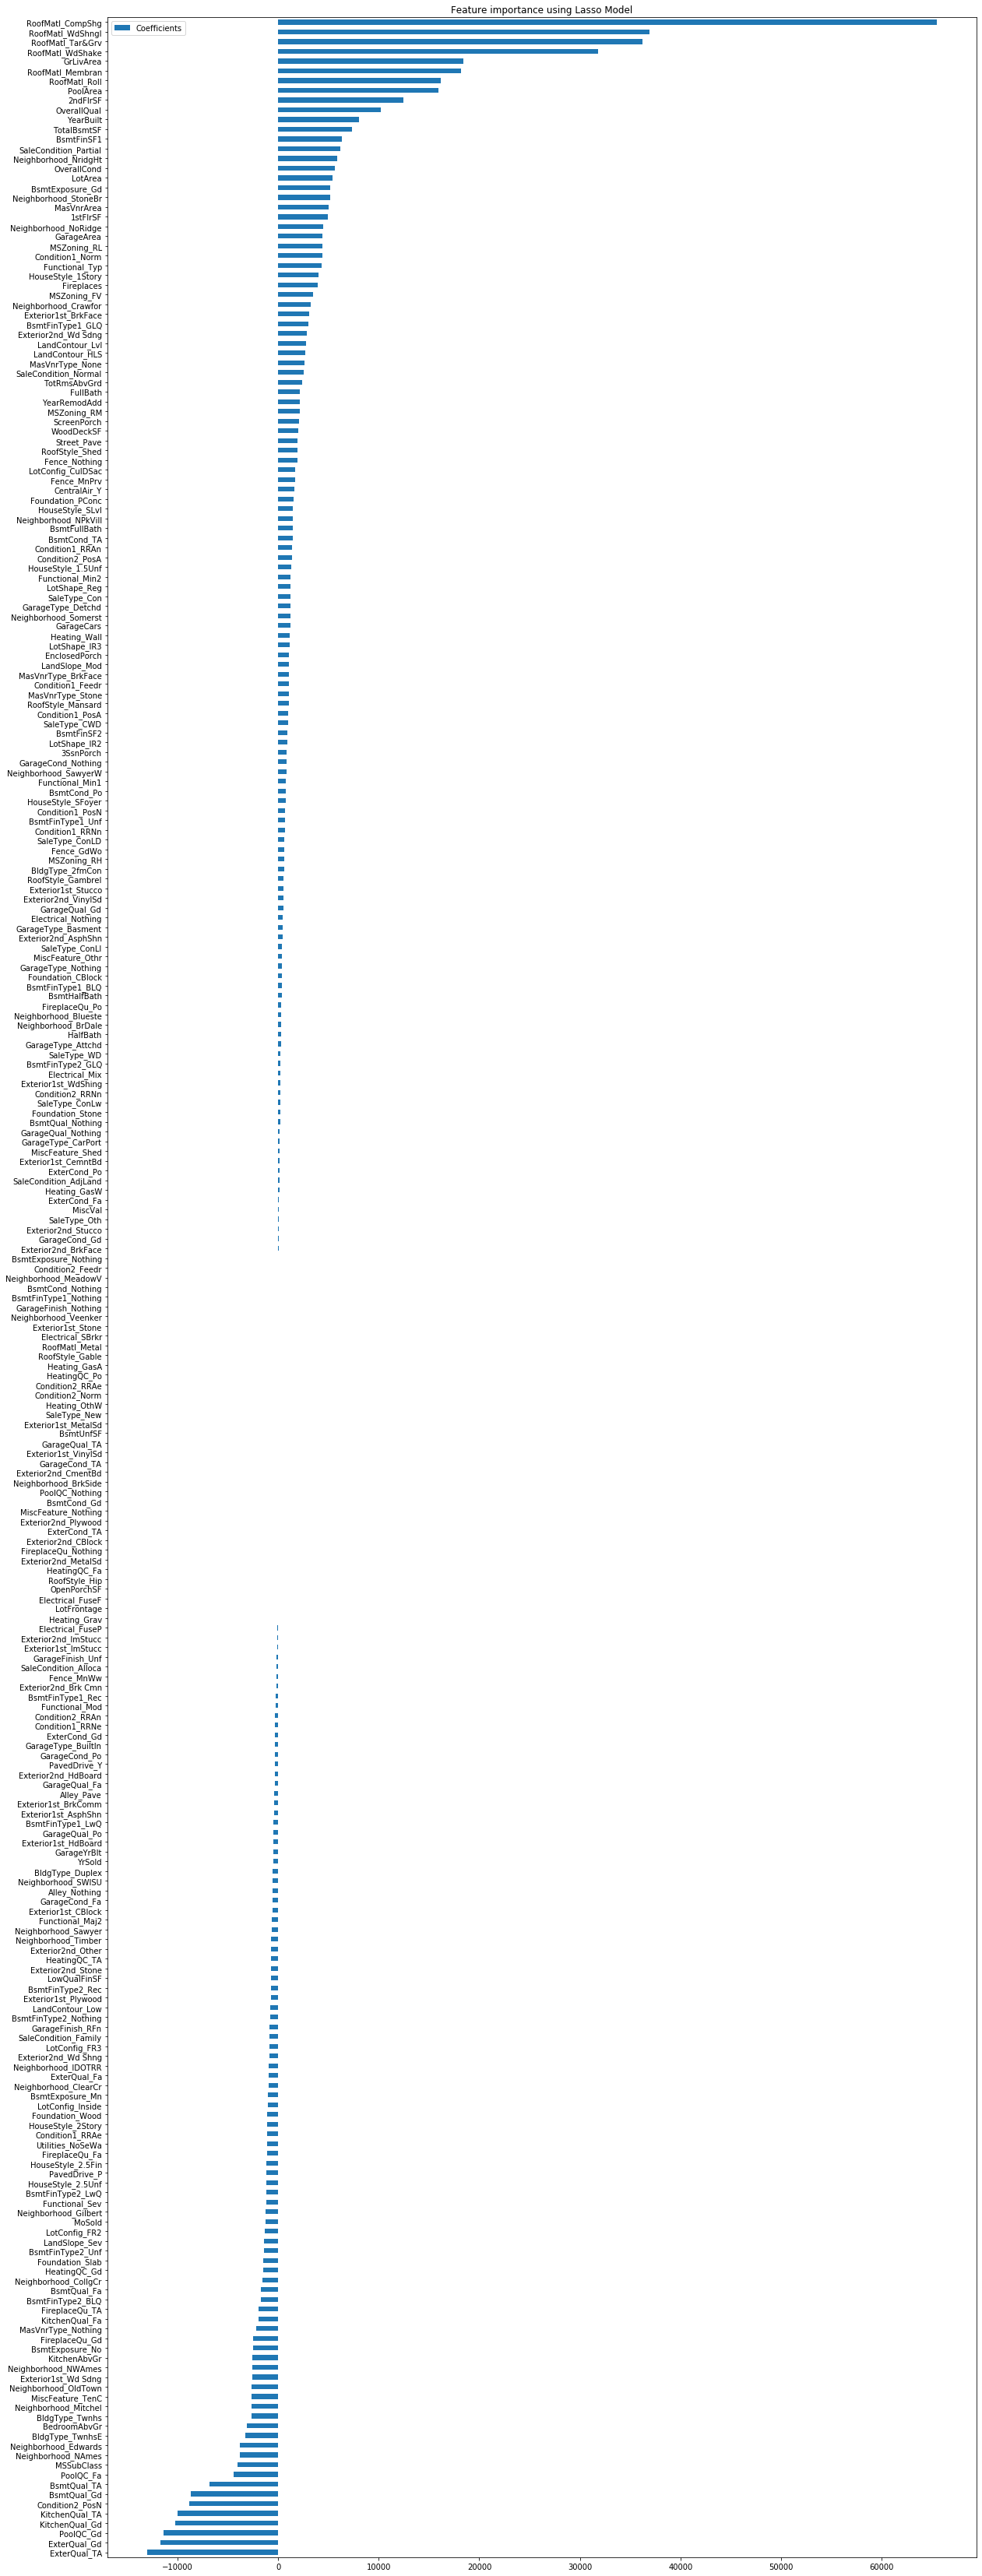

In [57]:
''' lasso coefficients plot '''

imp_coef = coefficients_lasso.sort_values('Coefficients')
plt.rcParams['figure.figsize'] = (20, 60)   
  
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

plt.show() 



## Part 3: Other models     

###  Part 3.1: Elastic Net       

In [58]:

# define elastic net 
elasticNet = ElasticNet()   

# set kfold and hyper-parameter range    
kfold = KFold(n_splits = 5, shuffle = True)
params_eNet = [ {'alpha':[0.001, 0.01, 0.1, 0.5, 1, 10, 100]}, 
               {'l1_ratio':[0, 0.25, 0.5, 0.75, 1]}]


# grid search 
grid_elasticNet = GridSearchCV(estimator = elasticNet, param_grid = params_eNet, cv = kfold)

# fit model 
grid_elasticNet.fit(X_train, y_train)      



/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201831631039.8275, tolerance: 582772075.9603271
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186079327769.76233, tolerance: 618038230.0467383
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209336447651.51785, tolerance: 609740719.9301114
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did no

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
                         {'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
grid_elasticNet.best_score_

0.806790515728918

In [60]:
grid_elasticNet.best_estimator_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

###  Part 3.2: Random forest regressor      

In [61]:

# define random forest regressor  
randomForest = RandomForestRegressor()   

# set kfold and hyper-parameter range    
kfold = KFold(n_splits = 5, shuffle = True)
params_randomForest = [{'n_estimators': [100, 300, 500]},  
                       {'max_depth': [10, 20, 30, 40]}, 
                       {'min_samples_split': [2, 5, 10]}, 
                       {'min_samples_leaf': [1, 2, 5]}]


# grid search 
grid_randomForest = GridSearchCV(estimator = randomForest, param_grid = params_randomForest, cv = kfold)

# fit model 
grid_randomForest.fit(X_train, y_train)    


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             ver

In [62]:
grid_randomForest.best_score_  

0.8379015668651192

In [63]:
grid_randomForest.best_estimator_  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

###  Part 3.3: Support vector regressor    

In [64]:

# define random forest regressor  
svr = SVR()   

# set kfold and hyper-parameter range    
kfold = KFold(n_splits = 5, shuffle = True)
params_svr = [{'kernel': ['rbf', 'linear']}]
              

# grid search 
grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = kfold)       

# fit model 
grid_svr.fit(X_train, y_train)  



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
grid_svr.best_score_  

0.15582765744279417

In [66]:
grid_randomForest.best_estimator_  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

###  Part 3.4: XG Boost regressor   

In [67]:

# define XGB regressor  
xgb_reg = XGBRegressor(objective = 'reg:squarederror')    

# set kfold and hyper-parameter range    
kfold = KFold(n_splits = 5, shuffle = True)
params_xgb_reg = [{'objective': ['reg:squarederror']}, 
                  {'colsample_bytree': [0.30]}, 
                  {'learning_rate': [0.1, 0.01]}, 
                  {'max_depth': [5, 10, 15]},
                  {'alpha': [10]}, 
                  {'n_estimators': [10]}]    
              

# grid search 
grid_xgb_reg = GridSearchCV(estimator = xgb_reg, param_grid = params_xgb_reg, cv = kfold)       

# fit model 
grid_xgb_reg.fit(X_train, y_train)  


NameError: name 'XGBRegressor' is not defined

In [ ]:
grid_xgb_reg.best_score_    

In [ ]:
grid_xgb_reg.best_estimator_    

#### Summary of all the models in this notebook:
- Multiple linear regression [ lin_reg ]
- Ridge [ grid_ridge ]
- Lasso [ grid_lasso ]
- Elastic net [ grid_elasticNet ]
- Random forest [ grid_randomForest ]
- Support vector regressor [ grid_svr ]
- XG Boost Regressor [ grid_xgb_reg ]

#### Each of the above models were trained on X_train & y_train

#### We want to assemble a table of R^2 per model and to extract p-value significance for each variable in each model
- To do so we will create list of model names,
- Evaluate each score on X_train and y_train
- Separately come up with function to perform stats module actions
- Create for loop to horizontally merge p value columns from each model

#### Nested for loop to fit models based on y_train or log of y_train and to save the scores

In [107]:

model_names = ['lin_reg', 'grid_ridge', 'grid_lasso', 'grid_elasticNet', 'grid_randomForest', 'grid_svr'] 
#model_names = ['lin_reg', 'grid_ridge', 'grid_svr'] 
model_trans = ['y_train', 'np.log(y_train)']

for y_vals in model_trans:
    
    model_scores = []

    for model in model_names:
        if model == 'lin_reg':
            eval(model+'.fit(X_train,'+y_vals+')')
            score = eval(model+'.score(X_train, y_train)')
            model_scores.append(round(score,4))
            print('Completed fitting and scoring the ', model, ' model with ', y_vals, ' data.')
        else:
            eval(model+'.fit(X_train,'+y_vals+')')
            score = eval(model+'.best_score_')
            model_scores.append(round(score,4))
            print('Completed fitting and scoring the ', model, ' model with ', y_vals, ' data.')
        
    if y_vals == 'y_train':
        No_Transformation_DF = pd.DataFrame({'Model': model_names, 'R^2': model_scores})
        No_Transformation_DF = No_Transformation_DF.set_index('Model')
        No_Transformation_DF = No_Transformation_DF.rename(columns={"R^2": "R^2 y_train"})
    else:
        Log_Transformation_DF = pd.DataFrame({'Model': model_names, 'R^2': model_scores})
        Log_Transformation_DF = Log_Transformation_DF.set_index('Model')
        Log_Transformation_DF = Log_Transformation_DF.rename(columns={"R^2": "R^2 log(y_train)"})

        
Score_df = pd.concat([No_Transformation_DF, Log_Transformation_DF], axis=1, sort=False)
Score_df


Completed fitting and scoring the  lin_reg  model with  y_train  data.
Completed fitting and scoring the  grid_ridge  model with  y_train  data.


/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202236614281.35446, tolerance: 605865662.4107381
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189930783051.00195, tolerance: 587039858.6580437
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144057450565.3711, tolerance: 522063480.21192056
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did n

/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1202248140.3131714, tolerance: 605865662.4107381
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1322709458.1897583, tolerance: 522063480.21192056
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6175897997.278015, tolerance: 599036396.3002293
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did n

Completed fitting and scoring the  grid_lasso  model with  y_train  data.


/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165172117166.66574, tolerance: 575579460.105726
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186473881072.73083, tolerance: 567497892.8152583
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190686561857.07257, tolerance: 601684143.3993889
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did no

Completed fitting and scoring the  grid_elasticNet  model with  y_train  data.
Completed fitting and scoring the  grid_randomForest  model with  y_train  data.
Completed fitting and scoring the  grid_svr  model with  y_train  data.
Completed fitting and scoring the  lin_reg  model with  np.log(y_train)  data.
Completed fitting and scoring the  grid_ridge  model with  np.log(y_train)  data.


/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02971147039869848, tolerance: 0.014679600940191037
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09347351811608284, tolerance: 0.013945105195557313
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030378640848040206, tolerance: 0.014600116564372417
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Ob

Completed fitting and scoring the  grid_lasso  model with  np.log(y_train)  data.


/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04275652746041292, tolerance: 0.015041203192756172
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.511950018071657, tolerance: 0.014571970229539278
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.582608938275634, tolerance: 0.015041203192756172
  positive)
/Users/michaellink/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objec

Completed fitting and scoring the  grid_elasticNet  model with  np.log(y_train)  data.
Completed fitting and scoring the  grid_randomForest  model with  np.log(y_train)  data.
Completed fitting and scoring the  grid_svr  model with  np.log(y_train)  data.


,R^2 y_train,R^2 log(y_train)
Model,,
lin_reg,0.9342,-5.2552
grid_ridge,0.7535,0.8342
grid_lasso,0.7856,0.8316
grid_elasticNet,0.7928,0.8447
grid_randomForest,0.8527,0.8618
grid_svr,0.1537,0.7613


In [106]:
# Function to get printout of OLS statistical significance

def R_stats_printout(X_data, y_data, transformation_method = 'linear'):
    '''
    Transformation method can be linear or log transformation
    '''
    if transformation_method == 'linear':
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(y_data, x)
        results = model.fit()
        print(results.summary())
    else:
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(np.log(y_data), x)
        results = model.fit()
        print(results.summary())
    

R_stats_printout(X_train, y_train)

def R_stats_P_values(X_data, y_data, transformation_method = 'linear'):
    '''
    Transformation method can be linear or log transformation
    '''
    if transformation_method == 'linear':
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(y_data, x)
        results = model.fit()
        pValues = results.pvalues
        return pValues
    else:
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(np.log(y_data), x)
        results = model.fit()
        pValues = results.pvalues
        return pValues

    
P_values = R_stats_P_values(X_data, y_data)
P_values



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     53.41
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        01:15:59   Log-Likelihood:                -13246.
No. Observations:                1168   AIC:                         2.698e+04
Df Residuals:                     922   BIC:                         2.823e+04
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.821e+05    670.968    271.339      0.0

In [103]:
# Attempt at ridge and lasso regression... alas statsmodels is not a good package for this:
    # https://groups.google.com/forum/#!topic/pystatsmodels/nC_boeczVWo
    # https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x) #.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=1.0)
results = model.fit_regularized()

print(results.summary())

NotImplementedError: 